In [235]:
import pandas as pd
import seaborn as sns
import numpy as np

In [236]:
df = pd.read_csv('/Users/guillermo/Downloads/Donor___Donor_Ethnicity_by_Donor_Type.csv')
df

,Unnamed: 0,Unnamed: 1,All Ethnicities,White,Black,Hispanic,Unknown,Asian,American Indian/Alaska Native,Pacific Islander,Multiracial
0,All Donor Types,NaN,"413,435","290,985","53,737","51,674",328,"10,588","1,891","1,328","2,904"
1,Deceased Donor,NaN,"239,921","168,019","34,046","29,268",217,"5,098",997,588,"1,688"
2,Living Donor,NaN,"173,514","122,966","19,691","22,406",111,"5,490",894,740,"1,216"


In [237]:
df.drop(['Unnamed: 1', 'American Indian/Alaska Native', 'Pacific Islander', 'Unknown'], axis = 1, inplace = True)
df.rename(columns={'Unnamed: 0': 'Donor Type'}, inplace = True)
df.dtypes

Donor Type         object
All Ethnicities    object
White              object
Black              object
Hispanic           object
Asian              object
Multiracial        object
dtype: object

In [238]:
df['White'] = df['White'].str.replace(',','').astype(int)
df['Black'] = df['Black'].str.replace(',','').astype(int)
df['Hispanic'] = df['Hispanic'].str.replace(',','').astype(int)
df['Asian'] = df['Asian'].str.replace(',','').astype(int)
df['Multiracial'] = df['Multiracial'].str.replace(',','').astype(int)
df['All Ethnicities'] = df['All Ethnicities'].str.replace(',', '').astype(int)
df.values

array([['All Donor Types', 413435, 290985, 53737, 51674, 10588, 2904],
       ['Deceased Donor', 239921, 168019, 34046, 29268, 5098, 1688],
       ['Living Donor', 173514, 122966, 19691, 22406, 5490, 1216]],
      dtype=object)

In [239]:
df1 = df.loc[1:2]
df1.drop(['All Ethnicities'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Donor Type,All Ethnicities,White,Black,Hispanic,Asian,Multiracial
0,All Donor Types,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Deceased Donor,0.580311,0.577415,0.633567,0.566397,0.481488,0.581267
2,Living Donor,0.419689,0.422585,0.366433,0.433603,0.518512,0.418733


'\nDivide each column by the first column (All Ethnicities) \n& take that and compare against the population of each race \n\n'

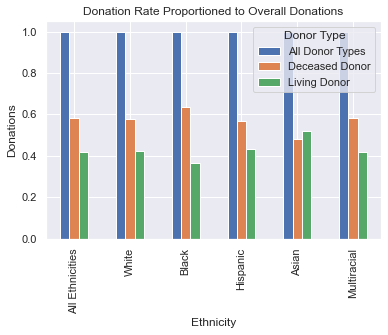

In [240]:
'''
Equation for normalizing the graph against the overall amount of donations
'''
df_max_scaled = df.copy()
columns = ['All Ethnicities', 'White', 'Black', 'Hispanic', 'Asian', 'Multiracial']
df_max_scaled[columns] = df_max_scaled[columns] /df_max_scaled[columns].abs().max()
display(df_max_scaled)
df_min_max_scaled = df.copy()
sns.set_theme(style="darkgrid")
ax = df_max_scaled.set_index('Donor Type').T.plot(kind = 'bar');
ax.set(xlabel="Ethnicity", ylabel = "Donations", title = 'Donation Rate Proportioned to Overall Donations');
# Label each axis and give chart a title "Living vs Donor rates of each race"
# create a similar graph that divides each column by ethnicity and compare that to population


'''
Divide each column by the first column (All Ethnicities) 
& take that and compare against the population of each race 

'''



# Stacked bar plot of each ethnicity's living donor and deceased donor donations. 
## obvious disparity in the African American community.. Why?

In [241]:
'''
Finding the mean of population across ethnicities using data from:
https://en.wikipedia.org/wiki/Historical_racial_and_ethnic_demographics_of_the_United_States
'''
whitesbydecade = np.array([0.803, 0.751, 0.724])
white_mean = np.mean(whitesbydecade)
print(white_mean)
blacksbydecade = np.array([0.121, 0.123, 0.126])
black_mean = np.mean(blacksbydecade)
print(black_mean)
hispanicbydecade = np.array([0.09, 0.125, 0.163])
hispanic_mean = np.mean(hispanicbydecade)
print(hispanic_mean)
asiansbydecade = np.array([0.029, 0.038, 0.049])
asians_mean = np.mean(asiansbydecade)
print(asians_mean)

0.7593333333333333
0.12333333333333334
0.126
0.03866666666666667


In [242]:
'''
Dropping columns that I do not need because of lack of information 
Next, normalizing the number of donations of each ethnicity and dividing that by the mean of population by ethnicity 
since 1990 - 2020.
This will tell us at what rate each population is donating to their ethnicity's respective proportion.
'''
dfpop = df.copy()
dfpop.drop(columns=['Multiracial'], inplace = True)
dfpop['All Ethnicities'] = dfpop['All Ethnicities']/dfpop['All Ethnicities']
dfpop['White'] = dfpop['White']/dfpop['All Ethnicities']
dfpop['Black'] = dfpop['Black']/dfpop['All Ethnicities']
dfpop['Hispanic'] = dfpop['Hispanic']/dfpop['All Ethnicities']
dfpop['Asian'] = dfpop['Asian']/dfpop['All Ethnicities']
# dfpop['All Ethnicities'].replace({413435: 413435*.100, 239921: 239921*0.100, 173514: 173514*0.100}, inplace = True);
dfpop['White'].replace({0.703823: 0.703823/white_mean, 0.700310: 0.700310/white_mean, 0.708681: 0.708681/white_mean}, inplace = True)
dfpop['Black'].replace({0.129977: 0.129977/black_mean, 0.141905: 0.141905/black_mean, 0.113484: 0.113484/black_mean}, inplace = True)
dfpop['Hispanic'].replace({0.124987: 0.124987/hispanic_mean, 0.121990: 0.121990/hispanic_mean, 0.129131: 0.129131/hispanic_mean}, inplace = True)
dfpop['Asian'].replace({0.025610: 0.025610/asians_mean, 0.021249: 0.021249/asians_mean, 0.031640: 0.031640/asians_mean}, inplace = True)
dfpop.drop(['All Ethnicities'], axis = 1, inplace = True);
dfpop

,Donor Type,White,Black,Hispanic,Asian
0,All Donor Types,290985.0,53737.0,51674.0,10588.0
1,Deceased Donor,168019.0,34046.0,29268.0,5098.0
2,Living Donor,122966.0,19691.0,22406.0,5490.0


# Graph of Ethnicities rate of donation to their respective ethnicity population.
## I'm wondering what these graphs will prove against the number of people on the waiting list per ethnicity

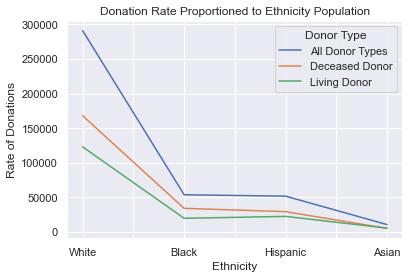

In [249]:
sns.set_theme(style="darkgrid")
ax = dfpop.set_index('Donor Type').T.plot(kind = 'line');
ax.set(xlabel="Ethnicity", ylabel = "Rate of Donations", title = 'Donation Rate Proportioned to Ethnicity Population');

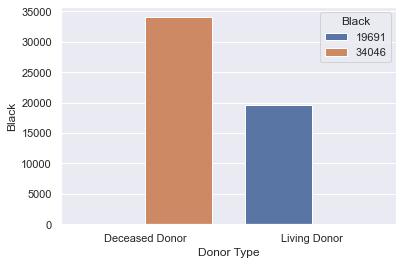

In [244]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Black', hue = 'Black');

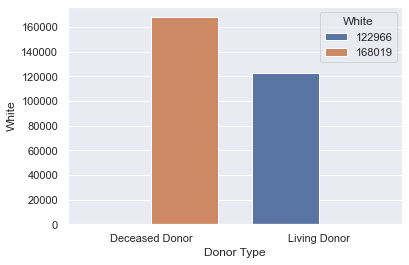

In [245]:
sns.barplot(data = df1, x = 'Donor Type', y = 'White', hue = 'White');

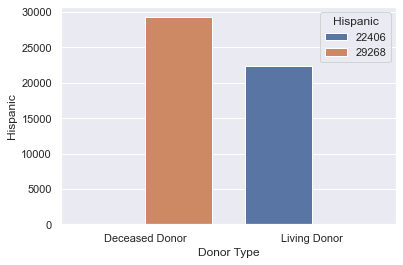

In [246]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Hispanic', hue = 'Hispanic');

<AxesSubplot:xlabel='Donor Type', ylabel='Asian'>

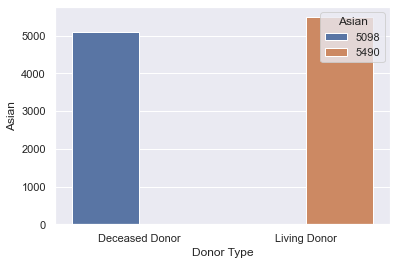

In [247]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Asian', hue = 'Asian')

<AxesSubplot:xlabel='Donor Type', ylabel='Multiracial'>

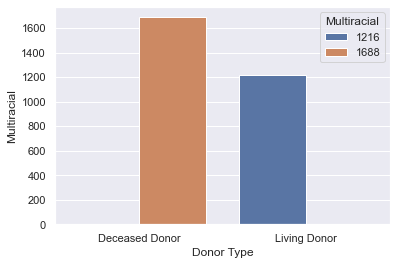

In [248]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Multiracial', hue = 'Multiracial')